In [18]:
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NEXUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEXUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Load the Test File
def load_reviews(filename, limit=None):
    reviews = []

    with open(filename, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if limit and i >= limit:
                break
            match = re.match(r'__label__(\d)\s(.+)',line.strip())
            if match:
                label = int(match.group(1))
                text = match.group(2)
                reviews.append((label, text))
    return pd.DataFrame(reviews, columns=['Label','Review'])

The provided code defines a function, `load_reviews`, which is designed to read and process a text file containing labeled reviews. The function extracts the labels and review texts from each line of the file and returns the data as a Pandas DataFrame with two columns: `'Label'` and `'Review'`.

### Function Parameters
The function accepts two parameters:
1. `filename`: A string representing the path to the file that contains the reviews.
2. `limit` (optional): An integer specifying the maximum number of lines to process. If `limit` is not provided, the function processes all lines in the file.

### Workflow
1. **Initialization**: An empty list, `reviews`, is created to store the extracted label-text pairs.
2. **File Reading**: The file is opened in read mode (`'r'`) with UTF-8 encoding using Python's built-in `open` function. The `with` statement ensures that the file is properly closed after processing.
3. **Line Iteration**: The function iterates over each line in the file using `enumerate`, which provides both the line index (`i`) and the line content (`line`).
   - If the `limit` parameter is specified and the number of processed lines reaches the limit, the loop breaks.
4. **Regex Matching**: Each line is stripped of leading and trailing whitespace using `line.strip()` and matched against the regular expression `r'__label__(\d)\s(.+)'`:
   - The pattern expects each line to start with `__label__` followed by a single digit (`\d`), a space (`\s`), and the review text (`.+`).
   - If the line matches the pattern, the `group(1)` method extracts the label (a single digit), and `group(2)` extracts the review text.
5. **Data Storage**: The extracted label is converted to an integer, and the label-text pair is appended to the `reviews` list as a tuple.
6. **DataFrame Creation**: After processing all lines (or reaching the limit), the `reviews` list is converted into a Pandas DataFrame with two columns: `'Label'` and `'Review'`.

### Output
The function returns the resulting DataFrame, which organizes the labeled reviews into a structured format suitable for further analysis or machine learning tasks.

### Key Considerations
- **Regular Expression**: The regex ensures that only lines with the expected format are processed. Lines that do not match the pattern are ignored.
- **Error Handling**: The function assumes the file exists and is properly formatted. If the file is missing or contains unexpected data, errors may occur.
- **Scalability**: The optional `limit` parameter allows the function to handle large files by processing only a subset of lines, which can be useful for testing or debugging.

This function is particularly useful for preprocessing labeled text data, such as sentiment analysis datasets, where each review is associated with a label indicating its sentiment or category.

In [20]:
Data = load_reviews('test.ft.txt',limit=5000)
Data

,Label,Review
0,2,Great CD: My lovely Pat has one of the GREAT v...
1,2,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ...: I bought thi...
3,2,"works fine, but Maha Energy is better: Check o..."
4,2,Great for the non-audiophile: Reviewed quite a...
...,...,...
4995,2,Stevenson's Best!: This book is the best book ...
4996,2,A treasure: This is an authentic masterpiece b...
4997,2,"Review of ""Treasure Island"": Stevenson's ""Trea..."
4998,2,Treasure Island: I read this year's ago and lo...


In [21]:
Data['Original_Sentiment'] = Data['Label'].map({1:'Negative',2:'Positive'})
Data

,Label,Review,Original_Sentiment
0,2,Great CD: My lovely Pat has one of the GREAT v...,Positive
1,2,One of the best game music soundtracks - for a...,Positive
2,1,Batteries died within a year ...: I bought thi...,Negative
3,2,"works fine, but Maha Energy is better: Check o...",Positive
4,2,Great for the non-audiophile: Reviewed quite a...,Positive
...,...,...,...
4995,2,Stevenson's Best!: This book is the best book ...,Positive
4996,2,A treasure: This is an authentic masterpiece b...,Positive
4997,2,"Review of ""Treasure Island"": Stevenson's ""Trea...",Positive
4998,2,Treasure Island: I read this year's ago and lo...,Positive


In [22]:
# Initialize the SentimentIntensityAnalyzer
stmia = SentimentIntensityAnalyzer()

In [23]:
def get_textBlob_polarity_score(text):
    return TextBlob(text).sentiment.polarity
def get_stmia_score(text):
    return stmia.polarity_scores(text)['compound']

In [24]:
# Applying Sentiment Analysis
Data['TextBlob_Polarity'] = Data['Review'].apply(get_textBlob_polarity_score)
Data['Stmia_Compound'] = Data['Review'].apply(get_stmia_score)
Data

,Label,Review,Original_Sentiment,TextBlob_Polarity,Stmia_Compound
0,2,Great CD: My lovely Pat has one of the GREAT v...,Positive,0.172917,0.9569
1,2,One of the best game music soundtracks - for a...,Positive,0.148958,0.8770
2,1,Batteries died within a year ...: I bought thi...,Negative,0.533333,0.7297
3,2,"works fine, but Maha Energy is better: Check o...",Positive,0.472222,0.7845
4,2,Great for the non-audiophile: Reviewed quite a...,Positive,0.301935,0.8388
...,...,...,...,...,...
4995,2,Stevenson's Best!: This book is the best book ...,Positive,0.543333,0.9866
4996,2,A treasure: This is an authentic masterpiece b...,Positive,0.138889,0.8729
4997,2,"Review of ""Treasure Island"": Stevenson's ""Trea...",Positive,0.294324,0.9861
4998,2,Treasure Island: I read this year's ago and lo...,Positive,0.690000,0.9570


In [25]:
def classify(score):
    if score >= 0.5:
        return "Positive"
    elif score <= -0.5:
        return "Negative"
    else:
        return "Neutral"

In [26]:
Data['TextBlob_Sentiment'] = Data['TextBlob_Polarity'].apply(classify)
Data['Stmia_Sentiment'] = Data['Stmia_Compound'].apply(classify)
Data

,Label,Review,Original_Sentiment,TextBlob_Polarity,Stmia_Compound,TextBlob_Sentiment,Stmia_Sentiment
0,2,Great CD: My lovely Pat has one of the GREAT v...,Positive,0.172917,0.9569,Neutral,Positive
1,2,One of the best game music soundtracks - for a...,Positive,0.148958,0.8770,Neutral,Positive
2,1,Batteries died within a year ...: I bought thi...,Negative,0.533333,0.7297,Positive,Positive
3,2,"works fine, but Maha Energy is better: Check o...",Positive,0.472222,0.7845,Neutral,Positive
4,2,Great for the non-audiophile: Reviewed quite a...,Positive,0.301935,0.8388,Neutral,Positive
...,...,...,...,...,...,...,...
4995,2,Stevenson's Best!: This book is the best book ...,Positive,0.543333,0.9866,Positive,Positive
4996,2,A treasure: This is an authentic masterpiece b...,Positive,0.138889,0.8729,Neutral,Positive
4997,2,"Review of ""Treasure Island"": Stevenson's ""Trea...",Positive,0.294324,0.9861,Neutral,Positive
4998,2,Treasure Island: I read this year's ago and lo...,Positive,0.690000,0.9570,Positive,Positive


In [27]:
print(Data[['Review','Original_Sentiment', 'TextBlob_Sentiment', 'Stmia_Sentiment']].head())


                                              Review Original_Sentiment  \
0  Great CD: My lovely Pat has one of the GREAT v...           Positive   
1  One of the best game music soundtracks - for a...           Positive   
2  Batteries died within a year ...: I bought thi...           Negative   
3  works fine, but Maha Energy is better: Check o...           Positive   
4  Great for the non-audiophile: Reviewed quite a...           Positive   

  TextBlob_Sentiment Stmia_Sentiment  
0            Neutral        Positive  
1            Neutral        Positive  
2           Positive        Positive  
3            Neutral        Positive  
4            Neutral        Positive  


In [28]:
# WordCloud for Positive Reviews (VADER)
positive_text = ' '.join(Data[Data['Stmia_Sentiment'] == 'Positive']['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)


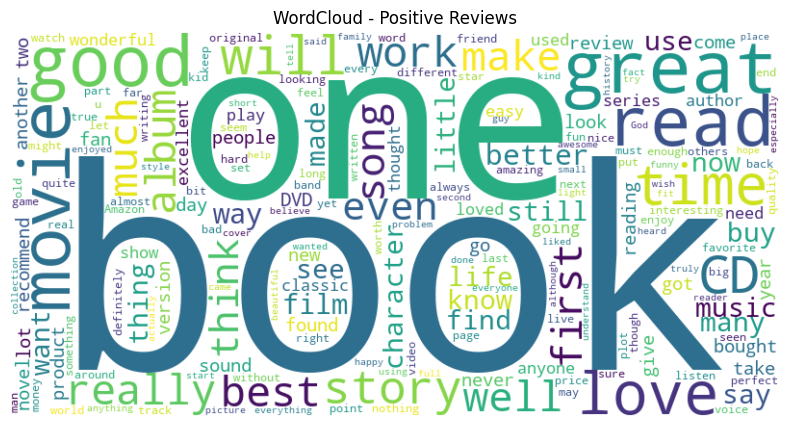

In [29]:
# Display WordCloud
plt.figure(figsize=(12,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()


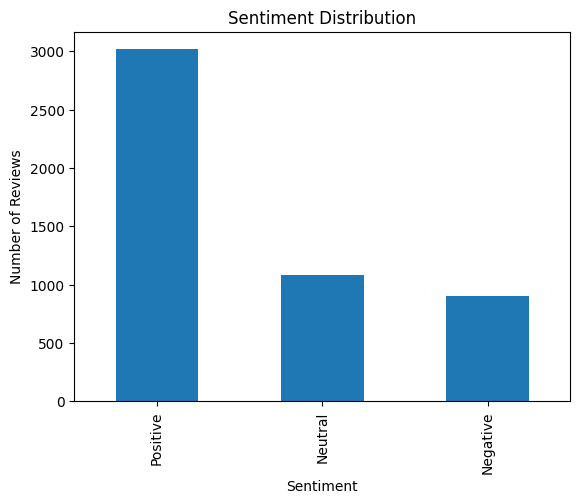

In [30]:
# Sentiment Distribution Chart
Data['Stmia_Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()
